## Auto Insurance Claim Fraud Detection

## Data Dictionary

| **Field Name**        | **Description**                                                                      |
|-----------------------|--------------------------------------------------------------------------------------|
| months_as_customer    | Number of months the customer has been with the insurance company.                  |
| age                   | Age of the insured person.                                                          |
| policy_number         | Unique identifier for the insurance policy.                                         |
| policy_bind_date      | Date when the insurance policy was initiated or bound.                               |
| policy_state          | State where the insurance policy is applicable.                                      |
| policy_csl            | Coverage limit and split format of the insurance policy (e.g., 250/500/1000).        |
| policy_deductable     | Deductible amount for the insurance policy.                                          |
| policy_annual_premium | Annual premium amount for the insurance policy.                                      |
| umbrella_limit        | Additional coverage limit beyond the regular policy.                                  |
| insured_zip           | ZIP code of the insured person.                                                     |
| insured_sex           | Gender of the insured person.                                                       |
| insured_education_level | Education level of the insured person.                                              |
| insured_occupation    | Occupation of the insured person.                                                   |
| insured_hobbies       | Hobbies of the insured person.                                                      |
| insured_relationship | Relationship of the insured person with the policyholder (e.g., spouse, child).      |
| capital-gains         | Amount of capital gains.                                                             |
| capital-loss          | Amount of capital losses.                                                            |
| incident_date         | Date when the incident occurred.                                                     |
| incident_type         | Type of incident (e.g., single vehicle collision, multi-vehicle collision, etc.).    |
| collision_type        | Type of collision (e.g., rear-end, side collision, etc.).                            |
| incident_severity     | Severity level of the incident (e.g., Minor Damage, Total Loss, etc.).               |
| authorities_contacted | Authorities contacted after the incident (e.g., Police, Fire, Ambulance, etc.).      |
| incident_state        | State where the incident occurred.                                                   |
| incident_city         | City where the incident occurred.                                                     |
| incident_location     | Specific location/address where the incident occurred.                                |
| incident_hour_of_the_day | Hour of the day when the incident occurred.                                         |
| number_of_vehicles_involved | Number of vehicles involved in the incident.                                       |
| property_damage       | Property damage indicator (Yes/No).                                                  |
| bodily_injuries       | Number of bodily injuries in the incident.                                           |
| witnesses             | Number of witnesses to the incident.                                                 |
| police_report_available | Indicator if a police report is available for the incident (Yes/No).                  |
| total_claim_amount    | Total claim amount for the incident.                                                 |
| injury_claim          | Claim amount for injuries in the incident.                                           |
| property_claim        | Claim amount for property damage in the incident.                                    |
| vehicle_claim         | Claim amount for vehicle damage in the incident.                                     |
| auto_make             | Make of the insured vehicle.                                                         |
| auto_model            | Model of the insured vehicle.                                                        |
| auto_year             | Year of manufacture of the insured vehicle.                                          |
| fraud_reported        | Indicator if fraud was reported for the incident (Yes/No).                            |
| _c39                  | (Note: Unclear field name or purpose, potentially irrelevant or placeholder data.)   |


## Importing Modules

In [1]:
# Modules for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier



# Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix



# Parameter Tuning

from sklearn.model_selection import GridSearchCV

## EDA

In [2]:
file1 = pd.read_csv('../DataSet/insurance_claims.csv')

In [3]:
file1.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
file1.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,...,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,...,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,...,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
file1.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
135,171,34,964657,1997-02-18,IN,250/500,2000,1277.25,0,605169,...,?,69200,13840,6920,48440,Volkswagen,Passat,1996,Y,NaN
284,189,36,967756,2007-04-28,OH,250/500,2000,1388.58,0,459122,...,YES,79560,13260,13260,53040,Ford,Escape,2009,N,NaN
928,84,30,844007,1995-07-17,IN,500/1000,2000,1827.38,0,433593,...,?,4620,420,840,3360,Audi,A5,1998,N,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
886,141,30,556538,2000-07-15,IL,250/500,1000,1851.78,0,465248,...,YES,61740,6860,6860,48020,Audi,A3,2002,N,NaN
95,80,25,992145,2012-03-01,IL,100/300,2000,1075.18,5000000,601112,...,YES,6930,1260,630,5040,Toyota,Highlander,2001,N,NaN
272,332,47,994538,1991-11-01,IL,100/300,2000,1083.01,0,448882,...,?,71760,11040,11040,49680,Jeep,Grand Cherokee,2010,Y,NaN
254,20,23,935596,1999-05-01,OH,500/1000,1000,1711.72,0,463678,...,NO,63250,5750,11500,46000,Chevrolet,Tahoe,2002,Y,NaN
172,73,29,154280,1993-01-29,IL,250/500,1000,1447.78,0,467947,...,?,44910,4990,4990,34930,Dodge,Neon,2001,N,NaN
932,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,...,YES,51400,5140,10280,35980,Honda,Civic,1996,N,NaN


In [6]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
file1.duplicated().sum()

0

In [8]:
file1.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**<font color="skyblue">Dropping the null values as the percentage of the null values are less. And Removing the Column _c39 as it is not useful for the model.(Note: Unclear field name or purpose, potentially irrelevant or placeholder data, and it's full of null values)</font>**

In [9]:
file1.drop('_c39', axis =1, inplace=True)

In [10]:
file1.dropna(inplace=True)

In [11]:
file1.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are few '?' values in the columns

In [12]:
file1['property_damage'].value_counts()

property_damage
?      329
NO     304
YES    276
Name: count, dtype: int64

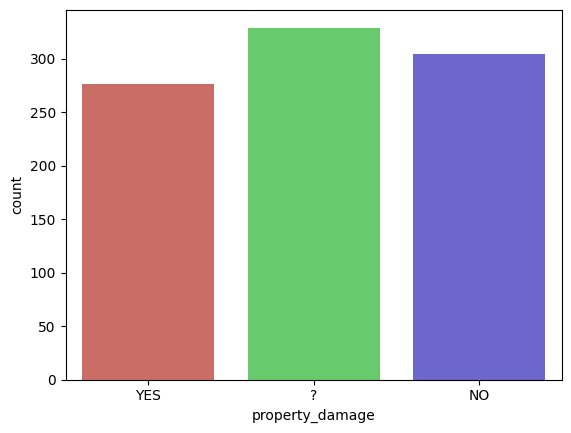

In [13]:
sns.countplot(x= 'property_damage', data = file1, hue = 'property_damage', palette='hls')
plt.show()

In [14]:
file1.groupby('property_damage')['fraud_reported'].value_counts()

property_damage  fraud_reported
?                N                 228
                 Y                 101
NO               N                 239
                 Y                  65
YES              N                 201
                 Y                  75
Name: count, dtype: int64

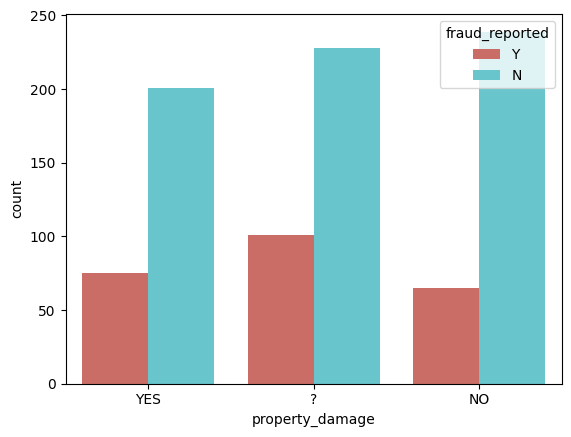

In [15]:
sns.countplot(x= 'property_damage', data = file1, hue = 'fraud_reported', palette='hls')
plt.show()

In [16]:
temp = file1[file1['property_damage'] != '?']['property_damage'].mode()[0]

In [17]:
file1['property_damage'] = file1['property_damage'].str.replace('?', temp)

In [18]:
file1['property_damage'].value_counts()

property_damage
NO     633
YES    276
Name: count, dtype: int64

In [19]:
file1['police_report_available'].value_counts()

police_report_available
?      316
NO     307
YES    286
Name: count, dtype: int64

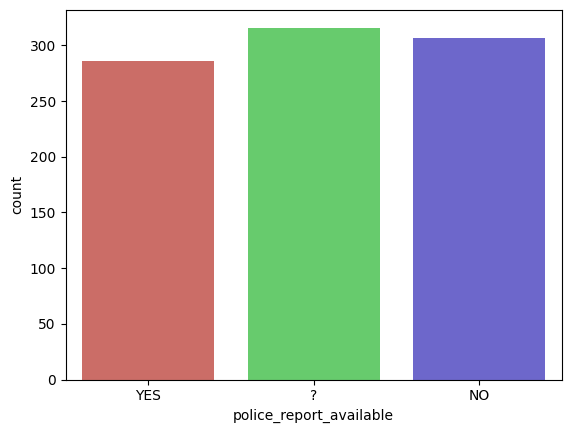

In [20]:
sns.countplot(x= 'police_report_available', data = file1, hue = 'police_report_available', palette='hls')
plt.show()

In [21]:
file1.groupby('police_report_available')['fraud_reported'].value_counts()

police_report_available  fraud_reported
?                        N                 229
                         Y                  87
NO                       N                 223
                         Y                  84
YES                      N                 216
                         Y                  70
Name: count, dtype: int64

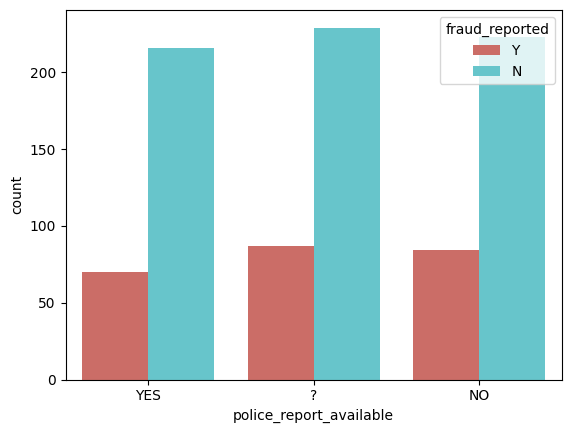

In [22]:
sns.countplot(x= 'police_report_available', data = file1, hue = 'fraud_reported', palette='hls')
plt.show()

In [23]:
file1['police_report_available'] = file1['police_report_available'].str.replace('?', file1[file1['police_report_available'] != '?']['police_report_available'].mode()[0])

In [24]:
file1['police_report_available'].value_counts()

police_report_available
NO     623
YES    286
Name: count, dtype: int64

In [25]:
file1['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                   87
Name: count, dtype: int64

In [26]:
file1.fillna({'collision_type': file1['collision_type'].mode()[0]}, inplace=True)
file1['collision_type'] = file1['collision_type'].str.replace('?',file1['collision_type'].mode()[0])

In [27]:
file1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,909.000000,909.000000,909.000000,909.000000,909.000000,9.090000e+02,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,205.027503,39.040704,546080.628163,1131.463146,1256.597712,1.088009e+06,500597.042904,24823.652365,-26923.652365,12.062706,1.922992,1.002200,1.481848,57507.645765,8100.891089,8064.906491,41341.848185,2005.125413
std,116.003078,9.192118,256283.335105,611.958791,245.236621,2.278747e+06,71474.927903,27719.509214,28277.509343,7.005145,1.031769,0.823656,1.111093,22779.061381,4615.021845,4552.940222,16253.292262,6.012991
min,0.000000,19.000000,100804.000000,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,337677.000000,500.000000,1090.030000,0.000000e+00,448190.000000,0.000000,-51800.000000,6.000000,1.000000,0.000000,0.000000,48060.000000,5260.000000,5340.000000,34370.000000,2000.000000
50%,202.000000,38.000000,532330.000000,1000.000000,1257.040000,0.000000e+00,466390.000000,0.000000,-22300.000000,13.000000,1.000000,1.000000,1.000000,60200.000000,7180.000000,7120.000000,43680.000000,2005.000000
75%,278.000000,45.000000,757644.000000,2000.000000,1415.680000,0.000000e+00,602942.000000,50400.000000,0.000000,18.000000,3.000000,2.000000,2.000000,72100.000000,11700.000000,11260.000000,51680.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [28]:
corr = file1.corr(numeric_only=True)

In [29]:
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922209,0.054543,0.031039,0.003161,0.014856,0.018316,0.011235,0.012649,0.078276,0.007600,-0.004542,0.047183,0.057304,0.060052,0.025795,0.056035,-0.003662
age,0.922209,1.000000,0.048465,0.032037,0.006252,0.008767,0.024681,-0.001925,-0.005044,0.092387,0.014846,-0.009031,0.042181,0.065127,0.070513,0.054234,0.056061,-0.003420
policy_number,0.054543,0.048465,1.000000,-0.018363,0.016241,-0.006924,0.014248,-0.010942,-0.007304,0.004124,0.015190,-0.006029,-0.004871,-0.021827,-0.009260,-0.011157,-0.024836,0.013944
policy_deductable,0.031039,0.032037,-0.018363,1.000000,-0.010063,-0.006726,-0.007881,0.024653,-0.018671,0.057806,0.062274,-0.019147,0.078426,0.045397,0.056627,0.086800,0.023231,0.020655
policy_annual_premium,0.003161,0.006252,0.016241,-0.010063,1.000000,-0.017367,0.033912,-0.007555,0.019277,-0.014627,-0.050450,0.049794,0.006961,0.010021,-0.021022,-0.015788,0.024435,-0.058510
umbrella_limit,0.014856,0.008767,-0.006924,-0.006726,-0.017367,1.000000,0.005240,-0.053344,-0.013155,-0.020147,-0.018193,0.018674,0.008026,-0.039511,-0.044977,-0.019217,-0.037221,0.004338
insured_zip,0.018316,0.024681,0.014248,-0.007881,0.033912,0.005240,1.000000,0.009523,0.046805,0.012205,0.037653,0.025319,0.013802,-0.023764,-0.007436,0.006126,-0.032910,-0.031719
capital-gains,0.011235,-0.001925,-0.010942,0.024653,-0.007555,-0.053344,0.009523,1.000000,-0.043159,-0.002326,0.077114,0.054737,-0.005777,0.045775,0.048000,0.017623,0.045588,0.025825
capital-loss,0.012649,-0.005044,-0.007304,-0.018671,0.019277,-0.013155,0.046805,-0.043159,1.000000,-0.017216,-0.011968,-0.018467,-0.039920,-0.035250,-0.045840,-0.019041,-0.031053,-0.047680
incident_hour_of_the_day,0.078276,0.092387,0.004124,0.057806,-0.014627,-0.020147,0.012205,-0.002326,-0.017216,1.000000,0.076704,-0.041062,0.014508,0.137883,0.095460,0.111256,0.134973,0.012912


<Axes: >

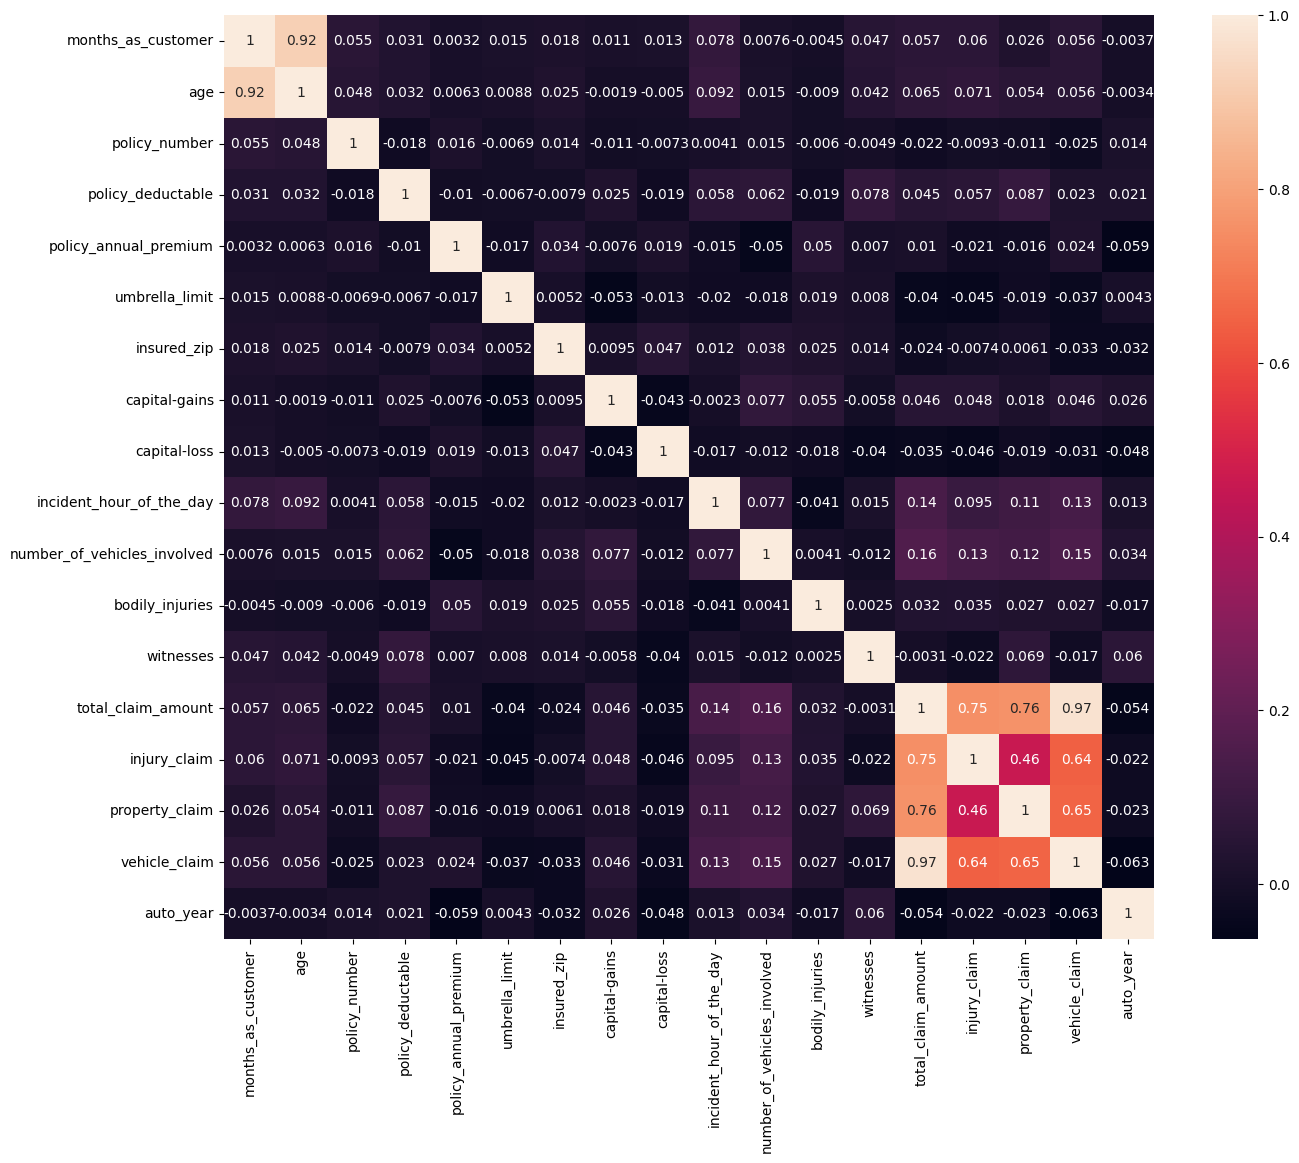

In [30]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr, annot = True)

We Can Observe High Correlation between Total claim amount with (injury_claim, property_claim, vehicle_claim) and also between injury_claim, property_claim, vehicle_claim. As Total Claim amount is the sum of injury_claim, property_claim, vehicle_claim, we can drop these columns. We Can remove the total_claim_amount column as it is the sum of injury_claim, property_claim, vehicle_claim.

In [31]:
# We can also observe very high correlation among age and total_months_as_costumer. So We can remove the age column here. (Depends upon business Scienoro)

file1.drop(['total_claim_amount', 'age'], axis =1, inplace = True)

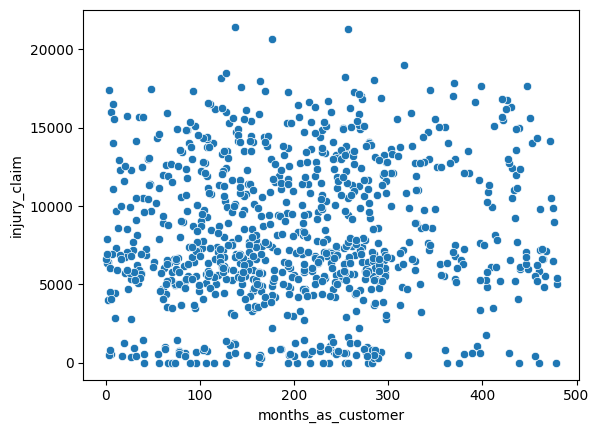

In [32]:
sns.scatterplot(x = 'months_as_customer', data = file1, y = 'injury_claim')
plt.show()

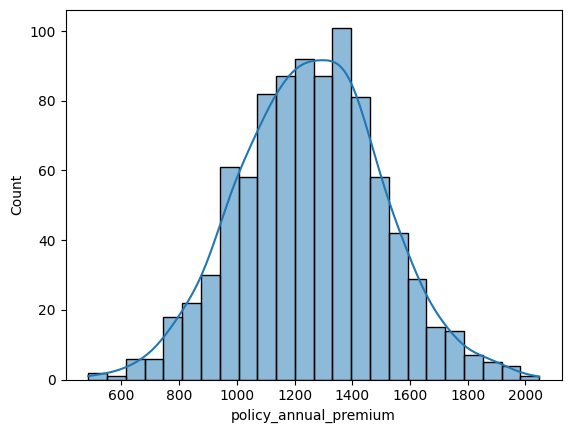

In [33]:
sns.histplot(x = 'policy_annual_premium', data = file1, kde = True)
plt.show()

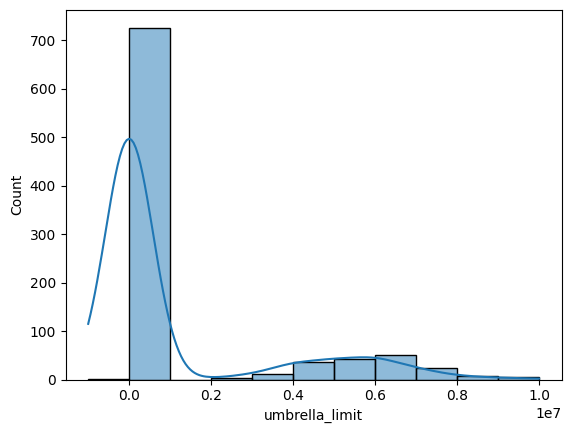

In [34]:
sns.histplot(x = 'umbrella_limit', data = file1, kde = True)
plt.show()

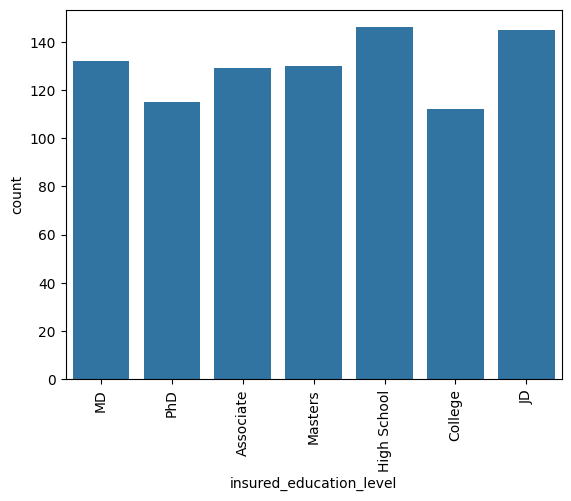

In [35]:
sns.countplot(x = 'insured_education_level', data = file1)
plt.xticks(rotation = 90)
plt.show()

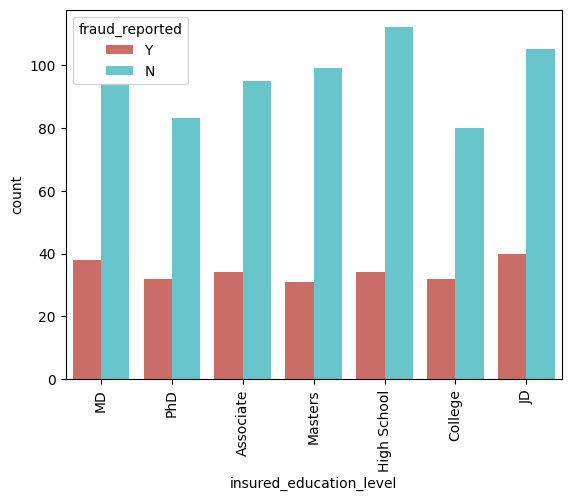

In [36]:
sns.countplot(x = 'insured_education_level', data = file1, hue = 'fraud_reported', palette='hls')
plt.xticks(rotation = 90)
plt.show()

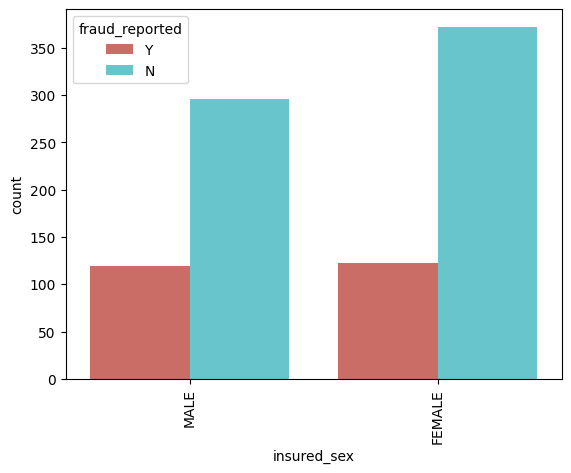

In [37]:
sns.countplot(x = 'insured_sex', data = file1, hue = 'fraud_reported', palette='hls')
plt.xticks(rotation = 90)
plt.show()

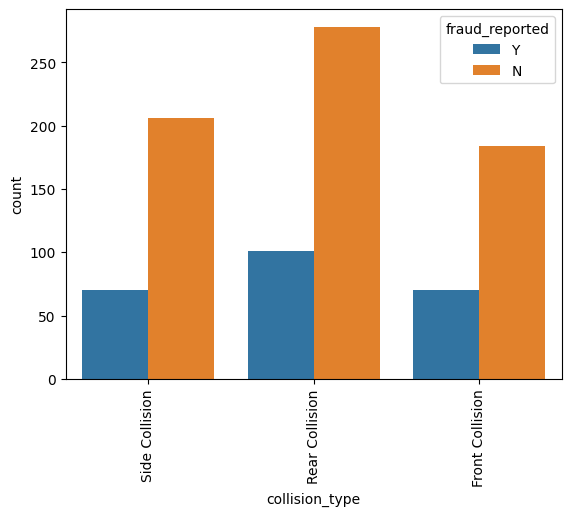

In [38]:
sns.countplot(x = 'collision_type', data = file1, hue = 'fraud_reported')
plt.xticks(rotation = 90)
plt.show()

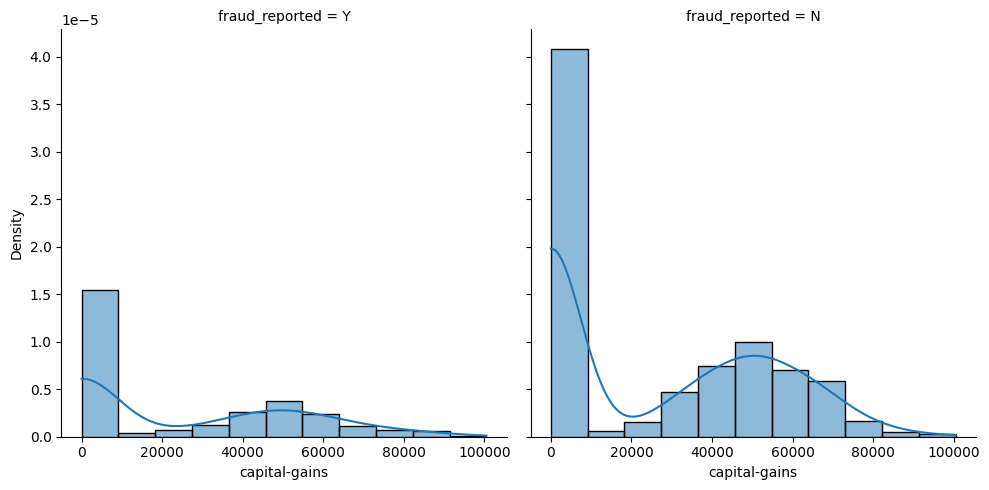

In [39]:
sns.displot(x = 'capital-gains', data = file1, kde = True, col = 'fraud_reported', stat = 'density')
plt.show()

In [40]:
numeric_cols = file1.select_dtypes(include=['number'])

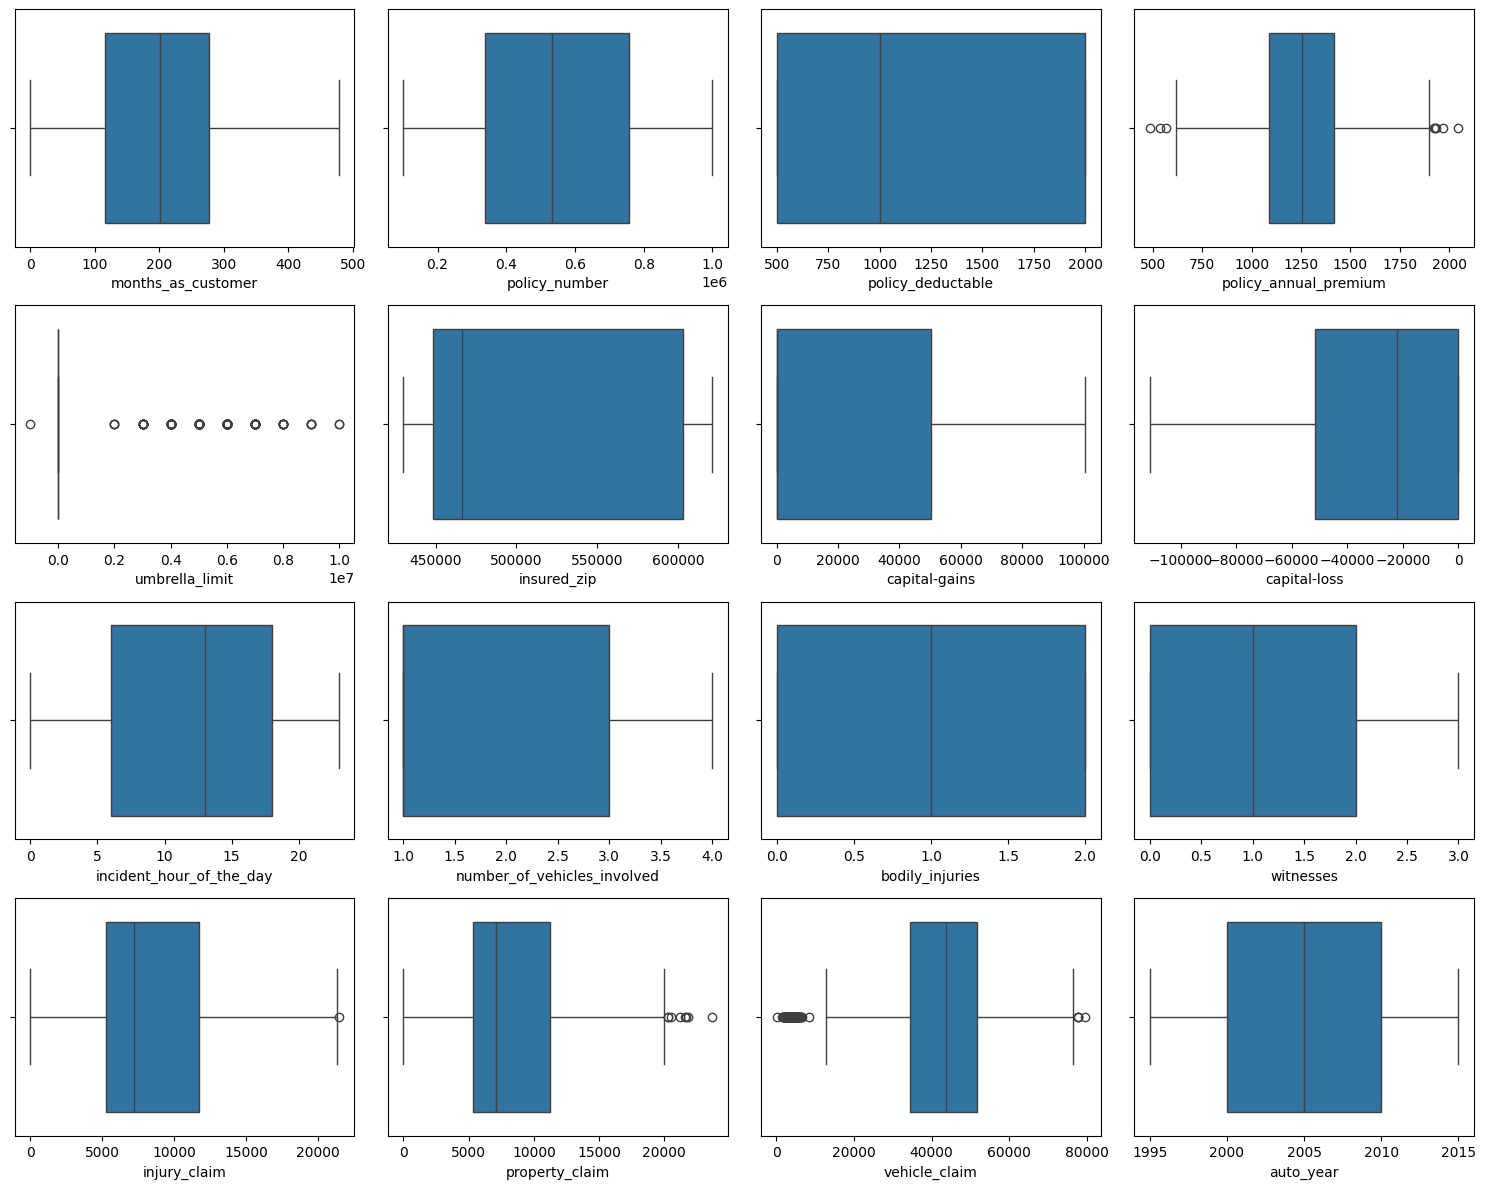

In [41]:
figure = plt.figure(figsize=(15, 12))

for i, j in enumerate(numeric_cols.columns):
    ax = plt.subplot(4,4,i+1)
    sns.boxplot(x = j, data = file1)
plt.tight_layout()
plt.show()

Here we can observe few outliers in the data. But it is not necessary to remove the outliers as the data is related to insurance fraud detection. So, we can keep the outliers as it is. If we observe the columns we can see all the columns are quite related to have quite outliers.

## **There are quite a few columns which are not useful for the model. So, we can drop those columns.**

In [42]:
file2 = file1.drop(['policy_number', 'policy_bind_date', 'insured_hobbies', 'incident_date', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'auto_make', 'auto_model', 'auto_year', 'policy_bind_date'], axis = 1)

In [43]:
file2

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,...,Police,1,YES,1,2,YES,6510,13020,52080,Y
1,228,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,Police,1,NO,0,0,NO,780,780,3510,Y
2,134,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,Police,3,NO,2,3,NO,7700,3850,23100,N
3,256,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,Police,1,NO,1,2,NO,6340,6340,50720,Y
5,256,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,...,Fire,3,NO,0,2,NO,6410,6410,51280,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,...,Fire,1,YES,0,1,NO,17440,8720,61040,N
996,285,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,...,Fire,1,YES,2,3,NO,18080,18080,72320,N
997,130,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,...,Police,3,NO,2,3,YES,7500,7500,52500,N
998,458,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,...,Other,1,NO,0,1,YES,5220,5220,36540,N


In [44]:
# Let's get the categorical_data.

categorical_data = file2.select_dtypes(include = ['object'])

In [45]:
categorical_data

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,IN,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,OH,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,IL,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
5,OH,250/500,FEMALE,PhD,tech-support,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,NO,NO,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NO,N
996,IL,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NO,N
997,OH,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,YES,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NO,YES,N


In [46]:
file2.drop(categorical_data.columns, axis = 1, inplace = True)

In [47]:
le = LabelEncoder()


for i in categorical_data.columns:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [48]:
categorical_data

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,2,1,1,4,2,0,2,2,0,3,1,1,1
1,1,1,1,4,6,2,3,1,1,3,0,0,1
2,2,0,0,6,11,3,0,1,1,3,0,0,0
3,0,1,0,6,1,4,2,0,0,3,0,0,1
5,2,1,0,6,12,4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,0,5,2,4,2,0,1,1,1,0,0
996,0,0,0,6,9,5,2,1,0,1,1,0,0
997,2,1,0,5,1,2,0,2,1,3,0,1,0
998,0,2,1,0,5,5,2,1,0,2,0,1,0


Scaling the Numerical Data

In [49]:
scaler = StandardScaler()

In [50]:
file2

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,466132,53300,0,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,468176,0,0,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,430632,35100,0,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,608117,48900,-62400,1,1,2,6340,6340,50720
5,256,1000,1351.10,0,478456,0,0,3,0,2,6410,6410,51280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,431289,0,0,1,0,1,17440,8720,61040
996,285,1000,1436.79,0,608177,70900,0,1,2,3,18080,18080,72320
997,130,500,1383.49,3000000,442797,35100,0,3,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,441714,0,0,1,0,1,5220,5220,36540


In [51]:
file3 = pd.concat([file2, categorical_data], axis = 1)

In [52]:
file3

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,328,1000,1406.91,0,466132,53300,0,1,1,2,...,4,2,0,2,2,0,3,1,1,1
1,228,2000,1197.22,5000000,468176,0,0,1,0,0,...,4,6,2,3,1,1,3,0,0,1
2,134,2000,1413.14,5000000,430632,35100,0,3,2,3,...,6,11,3,0,1,1,3,0,0,0
3,256,2000,1415.74,6000000,608117,48900,-62400,1,1,2,...,6,1,4,2,0,0,3,0,0,1
5,256,1000,1351.10,0,478456,0,0,3,0,2,...,6,12,4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,431289,0,0,1,0,1,...,5,2,4,2,0,1,1,1,0,0
996,285,1000,1436.79,0,608177,70900,0,1,2,3,...,6,9,5,2,1,0,1,1,0,0
997,130,500,1383.49,3000000,442797,35100,0,3,2,3,...,5,1,2,0,2,1,3,0,1,0
998,458,2000,1356.92,5000000,441714,0,0,1,0,1,...,0,5,5,2,1,0,2,0,1,0


In [53]:
X = file3.drop('fraud_reported', axis= 1)
y = file3['fraud_reported']

In [54]:
X_Scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size = 0.3, random_state = 5)

## **Models**

In [56]:
logistic_regression = LogisticRegression()
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=300)
k_neighbors = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()
extra_tree = ExtraTreeClassifier()

### Logistic Regression

In [57]:
logistic_regression.fit(X_train, y_train)


# Train Data
y_train_pred = logistic_regression.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = logistic_regression.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.7908805031446541
Precision: 0.6538461538461539
Recall: 0.4121212121212121
F1-score: 0.5055762081784386
Confusion Matrix for Training Set:
[[435  36]
 [ 97  68]]


Metrics for Test Set:
Accuracy: 0.7802197802197802
Precision: 0.66
Recall: 0.4342105263157895
F1-score: 0.5238095238095238
Confusion Matrix for Test Set:
[[180  17]
 [ 43  33]]


## Support Vector Machine

In [58]:
svc.fit(X_train, y_train)

# Train Data
y_train_pred = svc.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = svc.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.8663522012578616
Precision: 0.9878048780487805
Recall: 0.4909090909090909
F1-score: 0.6558704453441295
Confusion Matrix for Training Set:
[[470   1]
 [ 84  81]]


Metrics for Test Set:
Accuracy: 0.7252747252747253
Precision: 0.5454545454545454
Recall: 0.07894736842105263
F1-score: 0.13793103448275862
Confusion Matrix for Test Set:
[[192   5]
 [ 70   6]]


## Decision Tree

In [59]:
decision_tree.fit(X_train, y_train)


# Train Data
y_train_pred = decision_tree.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = decision_tree.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix for Training Set:
[[471   0]
 [  0 165]]


Metrics for Test Set:
Accuracy: 0.7362637362637363
Precision: 0.527027027027027
Recall: 0.5131578947368421
F1-score: 0.52
Confusion Matrix for Test Set:
[[162  35]
 [ 37  39]]


### Hyper Parameter Tuning

In [60]:
param_grids_dt = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [None, 5, 10, 20],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4],
	}

In [61]:
cv = GridSearchCV(estimator=decision_tree, param_grid=param_grids_dt, cv=5)
cv.fit(X_train, y_train)

model = cv.best_estimator_
print("Best Parameters: ", cv.best_params_)

best_train_predict = model.predict(X_train)
best_test_predict = model.predict(X_test)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [62]:
# Compute evaluation metrics for training set
accuracy_train_svc = accuracy_score(y_train, best_train_predict)
precision_train_svc = precision_score(y_train, best_train_predict)
recall_train_svc = recall_score(y_train, best_train_predict)
f1_train_svc = f1_score(y_train, best_train_predict)
conf_matrix_train_svc = confusion_matrix(y_train, best_train_predict)

# Compute evaluation metrics for test set
accuracy_test_svc = accuracy_score(y_test, best_test_predict)
precision_test_svc = precision_score(y_test, best_test_predict)
recall_test_svc = recall_score(y_test, best_test_predict)
f1_test_svc = f1_score(y_test, best_test_predict)
conf_matrix_test_svc = confusion_matrix(y_test, best_test_predict)

# Print evaluation metrics for training set
print("Training set (Decision Tree):")
print("Accuracy:", accuracy_train_svc)
print("Precision:", precision_train_svc)
print("Recall:", recall_train_svc)
print("F1-score:", f1_train_svc)
print("Confusion Matrix:")
print(conf_matrix_train_svc)
print()

# Print evaluation metrics for test set
print("Test set (Decision Tree):")
print("Accuracy:", accuracy_test_svc)
print("Precision:", precision_test_svc)
print("Recall:", recall_test_svc)
print("F1-score:", f1_test_svc)
print("Confusion Matrix:")
print(conf_matrix_test_svc)


Training set (Decision Tree):
Accuracy: 0.8427672955974843
Precision: 0.7480916030534351
Recall: 0.593939393939394
F1-score: 0.6621621621621622
Confusion Matrix:
[[438  33]
 [ 67  98]]

Test set (Decision Tree):
Accuracy: 0.7838827838827839
Precision: 0.6349206349206349
Recall: 0.5263157894736842
F1-score: 0.5755395683453237
Confusion Matrix:
[[174  23]
 [ 36  40]]


## Random Forest

In [63]:
random_forest.fit(X_train, y_train)


# Train Data
y_train_pred = random_forest.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Train Data
y_test_pred = random_forest.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix for Training Set:
[[471   0]
 [  0 165]]


Metrics for Test Set:
Accuracy: 0.7802197802197802
Precision: 0.6428571428571429
Recall: 0.47368421052631576
F1-score: 0.5454545454545454
Confusion Matrix for Test Set:
[[177  20]
 [ 40  36]]


### Hyper Parameter Tuning

In [64]:
param_grid_rf = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}



cv = GridSearchCV(estimator=random_forest, param_grid=param_grids_dt, cv=5)
cv.fit(X_train, y_train)

model = cv.best_estimator_
print("Best Parameters: ", cv.best_params_)

best_train_predict = model.predict(X_train)
best_test_predict = model.predict(X_test)



# Compute evaluation metrics for training set
accuracy_train_svc = accuracy_score(y_train, best_train_predict)
precision_train_svc = precision_score(y_train, best_train_predict)
recall_train_svc = recall_score(y_train, best_train_predict)
f1_train_svc = f1_score(y_train, best_train_predict)
conf_matrix_train_svc = confusion_matrix(y_train, best_train_predict)

# Compute evaluation metrics for test set
accuracy_test_svc = accuracy_score(y_test, best_test_predict)
precision_test_svc = precision_score(y_test, best_test_predict)
recall_test_svc = recall_score(y_test, best_test_predict)
f1_test_svc = f1_score(y_test, best_test_predict)
conf_matrix_test_svc = confusion_matrix(y_test, best_test_predict)

# Print evaluation metrics for training set
print("Training set (Decision Tree):")
print("Accuracy:", accuracy_train_svc)
print("Precision:", precision_train_svc)
print("Recall:", recall_train_svc)
print("F1-score:", f1_train_svc)
print("Confusion Matrix:")
print(conf_matrix_train_svc)
print()

# Print evaluation metrics for test set
print("Test set (Decision Tree):")
print("Accuracy:", accuracy_test_svc)
print("Precision:", precision_test_svc)
print("Recall:", recall_test_svc)
print("F1-score:", f1_test_svc)
print("Confusion Matrix:")
print(conf_matrix_test_svc)


Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training set (Decision Tree):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[471   0]
 [  0 165]]

Test set (Decision Tree):
Accuracy: 0.7912087912087912
Precision: 0.6557377049180327
Recall: 0.5263157894736842
F1-score: 0.583941605839416
Confusion Matrix:
[[176  21]
 [ 36  40]]


## KNN

In [65]:
k_neighbors.fit(X_train, y_train)

# Training Set Metrics
y_train_pred = k_neighbors.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Test Set Metrics
y_test_pred = k_neighbors.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)
print("\n")


Metrics for Training Set:
Accuracy: 0.7940251572327044
Precision: 0.7428571428571429
Recall: 0.3151515151515151
F1-score: 0.4425531914893617
Confusion Matrix for Training Set:
[[453  18]
 [113  52]]


Metrics for Test Set:
Accuracy: 0.6996336996336996
Precision: 0.42105263157894735
Recall: 0.21052631578947367
F1-score: 0.2807017543859649
Confusion Matrix for Test Set:
[[175  22]
 [ 60  16]]




### Hyper Parameter Tuning

In [66]:
k_neighbors_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # added 'brute' for cosine metric
    'leaf_size': [10, 20, 30],
    'p': [1, 2, 3, 4],
    'metric': ['minkowski', 'euclidean', 'manhattan']  # removed 'cosine'
}



cv_knn = GridSearchCV(estimator=k_neighbors, param_grid=k_neighbors_param_grid, cv=5, n_jobs =-1)
cv_knn.fit(X_train, y_train)

best_knn_model = cv_knn.best_estimator_
print("Best Parameters (K Neighbors Classifier):", cv_knn.best_params_)

best_train_predict_knn = best_knn_model.predict(X_train)
best_test_predict_knn = best_knn_model.predict(X_test)

accuracy_train_knn = accuracy_score(y_train, best_train_predict_knn)
precision_train_knn = precision_score(y_train, best_train_predict_knn)
recall_train_knn = recall_score(y_train, best_train_predict_knn)
f1_train_knn = f1_score(y_train, best_train_predict_knn)
conf_matrix_train_knn = confusion_matrix(y_train, best_train_predict_knn)

accuracy_test_knn = accuracy_score(y_test, best_test_predict_knn)
precision_test_knn = precision_score(y_test, best_test_predict_knn)
recall_test_knn = recall_score(y_test, best_test_predict_knn)
f1_test_knn = f1_score(y_test, best_test_predict_knn)
conf_matrix_test_knn = confusion_matrix(y_test, best_test_predict_knn)

print("Training set (K Neighbors Classifier):")
print("Accuracy:", accuracy_train_knn)
print("Precision:", precision_train_knn)
print("Recall:", recall_train_knn)
print("F1-score:", f1_train_knn)
print("Confusion Matrix:")
print(conf_matrix_train_knn)
print()

print("Test set (K Neighbors Classifier):")
print("Accuracy:", accuracy_test_knn)
print("Precision:", precision_test_knn)
print("Recall:", recall_test_knn)
print("F1-score:", f1_test_knn)
print("Confusion Matrix:")
print(conf_matrix_test_knn)


Best Parameters (K Neighbors Classifier): {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Training set (K Neighbors Classifier):
Accuracy: 0.7720125786163522
Precision: 0.7777777777777778
Recall: 0.1696969696969697
F1-score: 0.27860696517412936
Confusion Matrix:
[[463   8]
 [137  28]]

Test set (K Neighbors Classifier):
Accuracy: 0.7142857142857143
Precision: 0.4444444444444444
Recall: 0.10526315789473684
F1-score: 0.1702127659574468
Confusion Matrix:
[[187  10]
 [ 68   8]]


## Naive Bayes

In [67]:
naive_bayes.fit(X_train, y_train)

# Training Set Metrics
y_train_pred = naive_bayes.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Test Set Metrics
y_test_pred = naive_bayes.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)
print("\n")

Metrics for Training Set:
Accuracy: 0.7940251572327044
Precision: 0.6197183098591549
Recall: 0.5333333333333333
F1-score: 0.5732899022801303
Confusion Matrix for Training Set:
[[417  54]
 [ 77  88]]


Metrics for Test Set:
Accuracy: 0.7692307692307693
Precision: 0.6226415094339622
Recall: 0.4342105263157895
F1-score: 0.5116279069767442
Confusion Matrix for Test Set:
[[177  20]
 [ 43  33]]




## Extra Tree Classifier

In [68]:
# Extra Tree Classifier
extra_tree.fit(X_train, y_train)

# Training Set Metrics
y_train_pred = extra_tree.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Confusion Matrix for Training Set:")
print(conf_matrix_train)
print("\n")

# Test Set Metrics
y_test_pred = extra_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix for Training Set:
[[471   0]
 [  0 165]]


Metrics for Test Set:
Accuracy: 0.5897435897435898
Precision: 0.2692307692307692
Recall: 0.27631578947368424
F1-score: 0.2727272727272727
Confusion Matrix for Test Set:
[[140  57]
 [ 55  21]]


### Hyper Parameter Tuning

In [71]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'class_weight': ['balanced', None]
}




cv_extra_tree = GridSearchCV(estimator=extra_tree, param_grid=param_grid, cv=5, n_jobs=-1)
cv_extra_tree.fit(X_train, y_train)

best_extra_tree_model = cv_extra_tree.best_estimator_
print("Best Parameters (Extra Tree Classifier):", cv_extra_tree.best_params_)

best_train_predict_extra_tree = best_extra_tree_model.predict(X_train)
best_test_predict_extra_tree = best_extra_tree_model.predict(X_test)

accuracy_train_extra_tree = accuracy_score(y_train, best_train_predict_extra_tree)
precision_train_extra_tree = precision_score(y_train, best_train_predict_extra_tree)
recall_train_extra_tree = recall_score(y_train, best_train_predict_extra_tree)
f1_train_extra_tree = f1_score(y_train, best_train_predict_extra_tree)
conf_matrix_train_extra_tree = confusion_matrix(y_train, best_train_predict_extra_tree)

accuracy_test_extra_tree = accuracy_score(y_test, best_test_predict_extra_tree)
precision_test_extra_tree = precision_score(y_test, best_test_predict_extra_tree)
recall_test_extra_tree = recall_score(y_test, best_test_predict_extra_tree)
f1_test_extra_tree = f1_score(y_test, best_test_predict_extra_tree)
conf_matrix_test_extra_tree = confusion_matrix(y_test, best_test_predict_extra_tree)

print("Training set (Extra Tree Classifier):")
print("Accuracy:", accuracy_train_extra_tree)
print("Precision:", precision_train_extra_tree)
print("Recall:", recall_train_extra_tree)
print("F1-score:", f1_train_extra_tree)
print("Confusion Matrix:")
print(conf_matrix_train_extra_tree)
print()

print("Test set (Extra Tree Classifier):")
print("Accuracy:", accuracy_test_extra_tree)
print("Precision:", precision_test_extra_tree)
print("Recall:", recall_test_extra_tree)
print("F1-score:", f1_test_extra_tree)
print("Confusion Matrix:")
print(conf_matrix_test_extra_tree)


Best Parameters (Extra Tree Classifier): {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 10, 'min_samples_split': 5}
Training set (Extra Tree Classifier):
Accuracy: 0.8238993710691824
Precision: 0.7054263565891473
Recall: 0.5515151515151515
F1-score: 0.6190476190476191
Confusion Matrix:
[[433  38]
 [ 74  91]]

Test set (Extra Tree Classifier):
Accuracy: 0.7765567765567766
Precision: 0.631578947368421
Recall: 0.47368421052631576
F1-score: 0.5413533834586466
Confusion Matrix:
[[176  21]
 [ 40  36]]
